# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df.shape # 4324 rows and 9 columns

(4324, 9)

In [7]:
df.columns # There are 2 Unnamed columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df.isna().any() # There are NaN values in Price Column

Unnamed: 0        False
Unnamed: 0.1      False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

In [9]:
df.duplicated().any() # Apparently there are no duplicates

False

In [10]:
df.head() # Display first 5 rows

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
df.tail() # Display last 5 rows

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [12]:
df.sample(5) # Display random rows

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
532,532,532,Kosmotras,"Site 370/13, Yasny Cosmodrome, Russia","Thu Nov 06, 2014 07:35 UTC",Dnepr | Sasuke & Others,StatusRetired,29.0,Success
593,593,593,Land Launch,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Sat Aug 31, 2013 20:05 UTC",Zenit-3 SLB | AMOS 4,StatusActive,NaN,Success
3841,3841,3841,General Dynamics,"SLC-36A, Cape Canaveral AFS, Florida, USA","Tue Sep 20, 1966 12:32 UTC",Atlas-LV3C Centaur-D | Surveyor 2,StatusRetired,NaN,Success
972,972,972,Boeing,"SLC-17B, Cape Canaveral AFS, Florida, USA","Wed Jan 12, 2005 18:47 UTC",Delta II 7925 | Deep Impact,StatusRetired,NaN,Success
1515,1515,1515,Northrop,"Stargazer, Vandenberg AFB, California, USA","Mon Apr 03, 1995 13:48 UTC",Pegasus | Orbcomm F1 and F2 & OrbView-1,StatusRetired,40.0,Success


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [14]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1) # Remove columns containing junk data
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [15]:
df['Date'] = pd.to_datetime(df['Date'], utc=True) # convert Date column into datetime
df['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [16]:
df['Price'] = df['Price'].apply(lambda x:str(x).replace(',','')).astype('float64') # convert to float
df['Price'].isna().sum() # the number of nan values persists

3360

## Descriptive Statistics

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [19]:
df.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [20]:
launches_per_company = df['Organisation'].value_counts()
launches_per_company

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
ESA                   13
Eurockot              13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
Land Launch            7
JAXA                   7
MITT                   7
KCST                   5
UT                     5
CASIC                  5
CECLES                 4
Exos                   4
Arm??e de l'Air        4


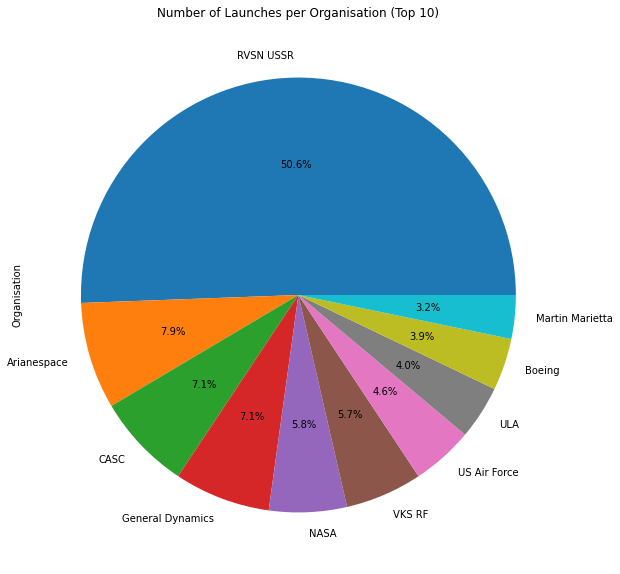

In [21]:
launches_per_company[:10].plot(
    kind='pie', 
    title='Number of Launches per Organisation (Top 10)',  
    figsize=(10,10),
    autopct='%1.1f%%'
)
plt.show()

There are way too many organization to chart, so I'll just take the top 10 organizations, and compare them.

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [22]:
df['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

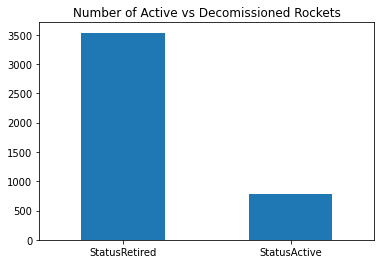

In [23]:
df['Rocket_Status'].value_counts().plot(
    kind='bar',
    title='Number of Active vs Decomissioned Rockets',
    rot=0,
)

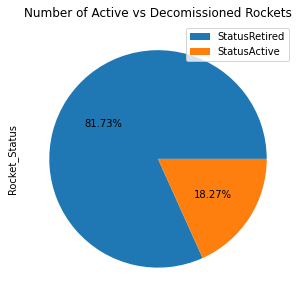

In [24]:
df['Rocket_Status'].value_counts().plot(
    kind='pie',
    title='Number of Active vs Decomissioned Rockets',
    figsize = (5,5),
    autopct = '%1.2f%%',
    labels = None
)

plt.legend(labels = df['Rocket_Status'].value_counts().index)
plt.show()

Up until the last input at the dataset, 18.27% rockets are still active

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [25]:
mission_status_df = df['Mission_Status'].value_counts()
mission_status_df

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

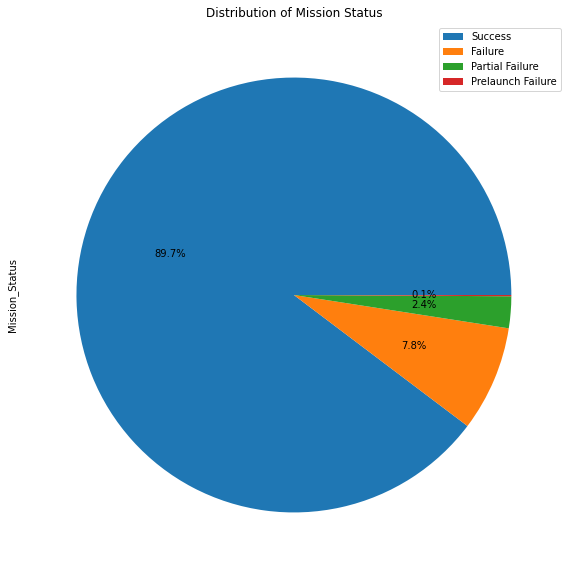

In [26]:
mission_status_df.plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    title = 'Distribution of Mission Status',
    labels=None
)

plt.legend(labels=mission_status_df.index)
plt.show()

We can see that until the last input of the dataset, 89.7% of missions were launched successfully, while 7.8% of missions failed.

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [27]:
price_distribution = df['Price'].value_counts()

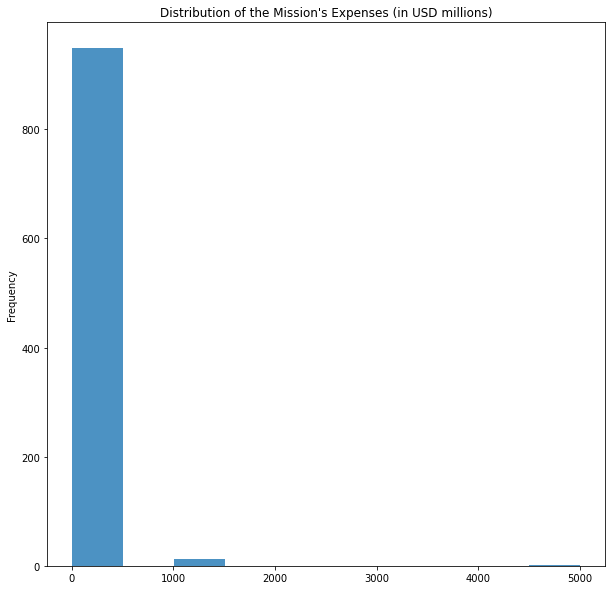

In [28]:
df['Price'].plot(
    kind='hist',
    title = "Distribution of the Mission's Expenses (in USD millions)",
    figsize = (10,10),
    alpha=0.8
)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [29]:
# Get Country
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())
df['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Yellow Sea                           1
Pacific Missile Range Facility       1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [30]:
# Replace some locations with its countries according to the current ISO3166
df['Country'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    }, 
    inplace=True
)
df['Country'] = df['Country'].apply(lambda x: countries.get(x).alpha3)
df['Country'].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

In [31]:
launches_per_country = df['Country'].value_counts()
launches_per_country

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

In [32]:
px.choropleth(
    launches_per_country,
    locations=launches_per_country.index,
    color=launches_per_country,
    title = 'Number of Launches by Country'
)

# Use a Choropleth Map to Show the Number of Failures by Country


In [33]:
failures_per_country = df[df['Mission_Status'] == 'Failure']['Country'].value_counts()
failures_per_country

USA    129
KAZ     72
RUS     63
CHN     19
FRA     13
JPN     10
IND      8
IRN      8
KIR      3
PRK      3
AUS      3
BRA      2
NZL      2
ISR      2
KOR      2
Name: Country, dtype: int64

In [68]:
px.choropleth(
    failures_per_country,
    locations=failures_per_country.index,
    color=failures_per_country,
    title = 'Number of Failures by Country'
)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [35]:
px.sunburst(df, path=['Country', 'Organisation', 'Mission_Status'], title='Mission Status by Country and Organization')

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [36]:
# Group Total Money Spent by Organization
money_spent_by_organization = df.groupby('Organisation')['Price'].sum()
money_spent_by_organization[money_spent_by_organization!=0]

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

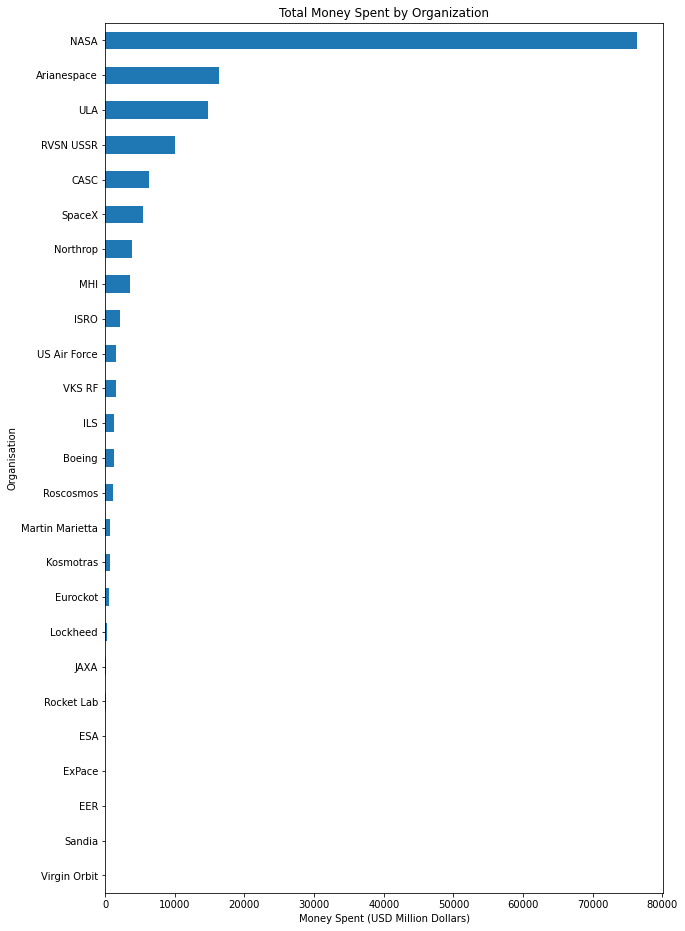

In [37]:
# I removed the NaN values (It seems many organization chose to not disclose their expenses)
money_spent_by_organization[money_spent_by_organization!=0].sort_values().plot(
    kind='barh',
    title = 'Total Money Spent by Organization',
    figsize=(10,16)
)

plt.xlabel('Money Spent (USD Million Dollars)')
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [38]:
avg_money_spent = df.groupby('Organisation').agg({'Price':np.mean})
avg_money_spent.dropna()

,Price
Organisation,
Arianespace,170.26
Boeing,177.29
CASC,40.13
EER,20.00
ESA,37.00
Eurockot,41.80
ExPace,28.30
ILS,101.54
ISRO,32.49


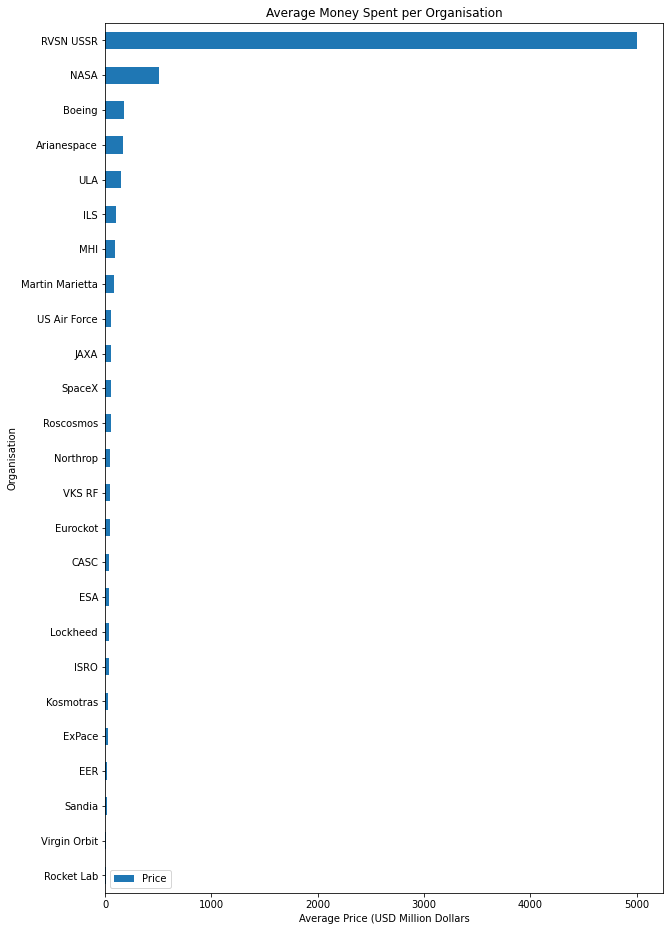

In [39]:
avg_money_spent.dropna().sort_values('Price').plot(
    kind='barh',
    figsize=(10,16),
    title='Average Money Spent per Organisation',
)

plt.xlabel('Average Price (USD Million Dollars')
plt.show()

# Chart the Number of Launches per Year

In [40]:
df['Year'] = df['Date'].dt.year
launches_per_year = df.groupby('Year')['Detail'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

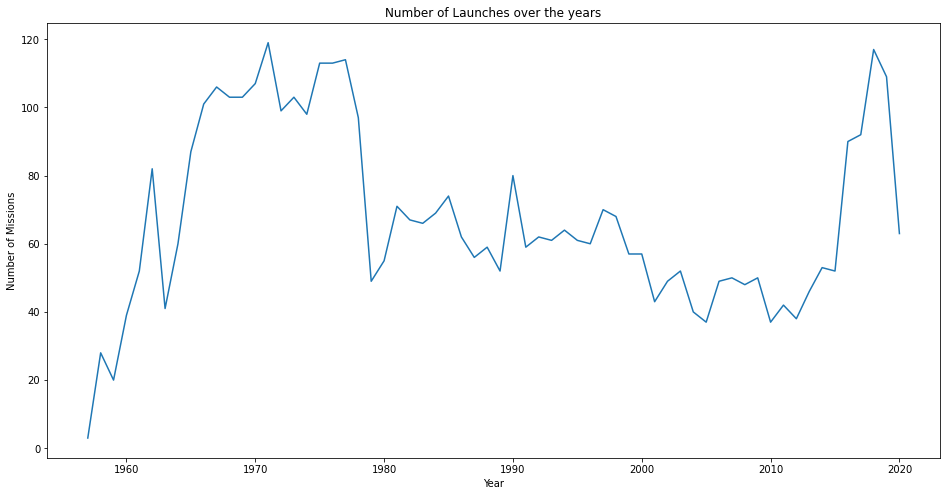

In [41]:
launches_per_year.plot(
    title='Number of Launches over the years',
    figsize = (16,8)
)

plt.ylabel('Number of Missions') 
plt.show()

Based on the chart, we can see that the number of launches peaked at at around 1970-1980 and 2015-2019

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [42]:
launches_per_month = df.groupby(df['Date'].dt.month)['Detail'].count()
launches_per_month

Date
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Detail, dtype: int64

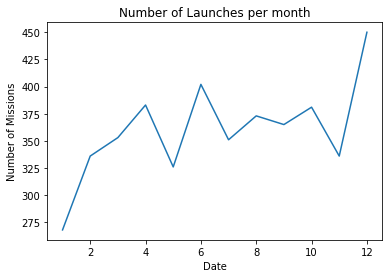

In [43]:
plt.figsize = (16,8)
launches_per_month.plot(title = 'Number of Launches per month')

plt.ylabel('Number of Missions') 
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [44]:
launches_per_month[launches_per_month == launches_per_month.max()]

Date
12    450
Name: Detail, dtype: int64

In [45]:
launches_per_month[launches_per_month == launches_per_month.min()]

Date
1    268
Name: Detail, dtype: int64

Least popular month for launches is January, while the most popular month for space missions is December

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [46]:
price_over_time = df.dropna().groupby('Date')['Price'].mean()
price_over_time

Date
1964-09-01 15:00:00+00:00    63.23
1964-12-10 16:52:00+00:00    63.23
1965-02-11 15:19:00+00:00    63.23
1965-05-06 15:00:00+00:00    63.23
1966-07-29 18:43:00+00:00    59.00
                             ...  
2020-07-25 03:13:00+00:00    64.68
2020-07-30 11:50:00+00:00   145.00
2020-07-30 21:25:00+00:00    65.00
2020-08-06 04:01:00+00:00    29.75
2020-08-07 05:12:00+00:00    50.00
Name: Price, Length: 963, dtype: float64

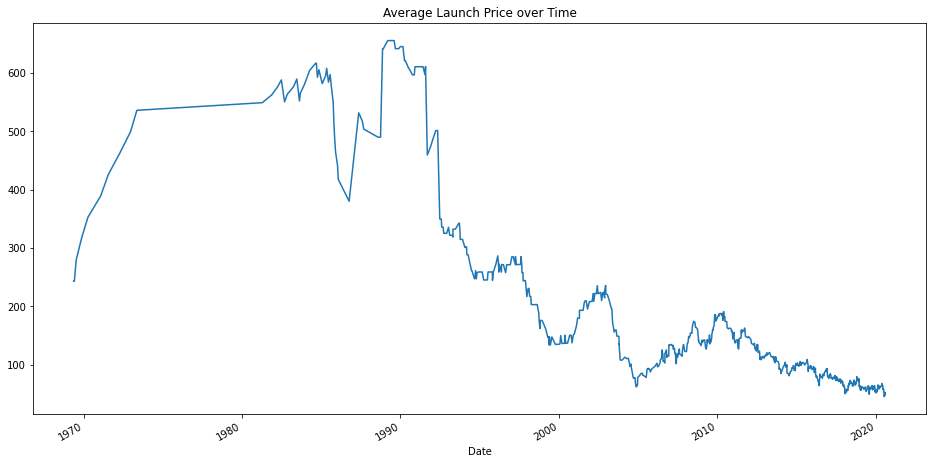

In [47]:
# Since the results are way too complicated, I used a rolling average to visualize the average launch price over time
price_over_time.rolling(30).mean().plot(
    figsize = (16,8),
    title = 'Average Launch Price over Time'
)

We can see that on average, the average expenses for launch peaked at the 1990s, but decreased over time until now

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [48]:
top_10_organisations = df['Organisation'].value_counts().sort_values(ascending=False)[:10].index.tolist()
top_10_organisations

['RVSN USSR',
 'Arianespace',
 'CASC',
 'General Dynamics',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [49]:
launches_by_top_10 = df[df['Organisation'].isin(top_10_organisations)].groupby(['Year','Organisation'])['Detail'].count().unstack(level=1)
launches_by_top_10.fillna(0, inplace=True) 
launches_by_top_10

Organisation,Arianespace,Boeing,CASC,General Dynamics,Martin Marietta,NASA,RVSN USSR,ULA,US Air Force,VKS RF
Year,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
1958,0.00,0.00,0.00,0.00,0.00,2.00,5.00,0.00,2.00,0.00
1959,0.00,0.00,0.00,1.00,0.00,1.00,4.00,0.00,10.00,0.00
1960,0.00,0.00,0.00,5.00,0.00,4.00,9.00,0.00,21.00,0.00
1961,0.00,0.00,0.00,8.00,0.00,12.00,9.00,0.00,23.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2016,11.00,0.00,22.00,0.00,0.00,0.00,0.00,12.00,0.00,4.00
2017,11.00,0.00,16.00,0.00,0.00,0.00,0.00,8.00,0.00,6.00
2018,11.00,0.00,37.00,0.00,0.00,0.00,0.00,8.00,0.00,5.00


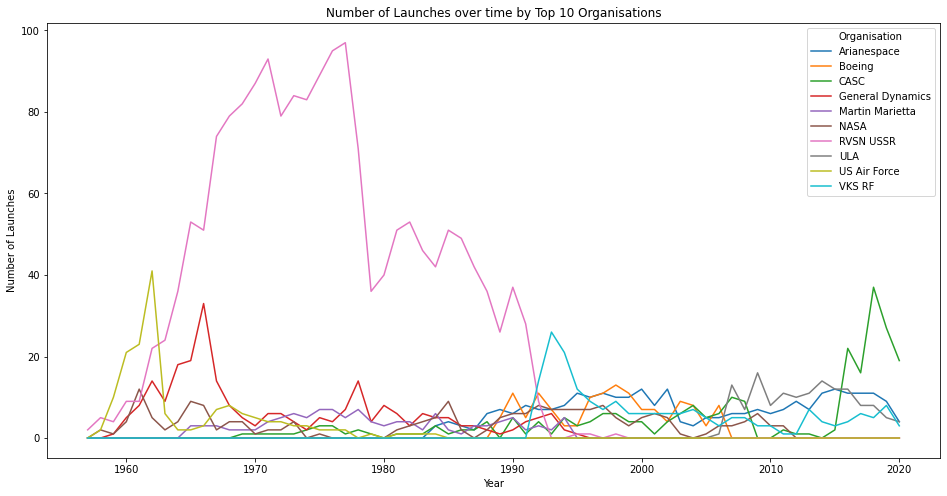

In [50]:
# I plot it based on year because if I plot it by date it will create a weirdly pointless visualization
launches_by_top_10.plot(
    figsize=(16,8),
    title = 'Number of Launches over time by Top 10 Organisations',
)

plt.ylabel('Number of Launches')
plt.show()

We can see that number of launches are dominated by US Air Force from before the 1960s up to the beginning of the 1960s. RVSN USSR dominates the number of launches up until the beginning of 1990s. After RSVN USSR seemed to stop launching rockets, the space race is mostly dominated by 3 organisations: VKS RF, Boeing, and Arianespace. However, in the mid 2000s, ULA joined the race and dominates the space race up until mid 2010s. Up until the last recorded data, the Space Race is dominated by none other than CASC

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [51]:
cold_war_df = df[df['Year']<=1991].sort_values('Year').reset_index(drop=True)

In [52]:
cold_war_df.shape

(2607, 9)

In [53]:
cold_war_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,nan,Success,KAZ,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,nan,Success,KAZ,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,nan,Failure,USA,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,nan,Success,USA,1958
4,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,nan,Success,USA,1958


In [54]:
for country in cold_war_df['Country'].drop_duplicates():
  print(countries.get(country))

Country(name='Kazakhstan', alpha2='KZ', alpha3='KAZ', numeric='398', apolitical_name='Kazakhstan')
Country(name='United States of America', alpha2='US', alpha3='USA', numeric='840', apolitical_name='United States of America')
Country(name='Russian Federation', alpha2='RU', alpha3='RUS', numeric='643', apolitical_name='Russian Federation')
Country(name='France', alpha2='FR', alpha3='FRA', numeric='250', apolitical_name='France')
Country(name='Japan', alpha2='JP', alpha3='JPN', numeric='392', apolitical_name='Japan')
Country(name='Australia', alpha2='AU', alpha3='AUS', numeric='036', apolitical_name='Australia')
Country(name='Kenya', alpha2='KE', alpha3='KEN', numeric='404', apolitical_name='Kenya')
Country(name='China', alpha2='CN', alpha3='CHN', numeric='156', apolitical_name='China')
Country(name='India', alpha2='IN', alpha3='IND', numeric='356', apolitical_name='India')
Country(name='Israel', alpha2='IL', alpha3='ISR', numeric='376', apolitical_name='Israel')


In [55]:
# Replace Kazakhstan with Russian Federation, since at that time Kazakhstan is part of the Soviet Republic
cold_war_df['Country'].replace(
    {'KAZ':'RUS'},
    inplace=True
)
cold_war_df['Country'].value_counts()

RUS    1770
USA     662
FRA      61
JPN      52
CHN      38
KEN       9
IND       7
AUS       6
ISR       2
Name: Country, dtype: int64

In [56]:
ussr_vs_usa = cold_war_df[cold_war_df['Country'].isin(['RUS','USA'])]
ussr_vs_usa

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,nan,Success,RUS,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,nan,Success,RUS,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,nan,Failure,USA,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,nan,Success,USA,1958
4,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,nan,Success,USA,1958
...,...,...,...,...,...,...,...,...,...
2601,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-04 09:00:00+00:00,Tsyklon-3 | Okean 3,StatusRetired,nan,Success,RUS,1991
2602,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05 13:24:00+00:00,Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,USA,1991
2603,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-06-11 05:42:00+00:00,Cosmos-3M (11K65M) | Cosmos 2150,StatusRetired,nan,Success,RUS,1991
2604,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-13 15:41:00+00:00,Tsyklon-3 | Cosmos 2151,StatusRetired,nan,Success,RUS,1991


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [57]:
px.pie(
    title = 'Total Number of Launches (USSR vs USA)',
    values = ussr_vs_usa['Country'].value_counts(),
    names = ussr_vs_usa['Country'].value_counts().index,
)

USSR launched more missions than USA

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [58]:
cold_war_launch_by_year = ussr_vs_usa.groupby(['Year','Country'])['Mission_Status'].count().unstack(level=1)
cold_war_launch_by_year

Country,RUS,USA
Year,,
1957,2,1
1958,5,23
1959,4,16
1960,9,30
1961,9,43
1962,22,60
1963,24,17
1964,36,24
1965,53,33


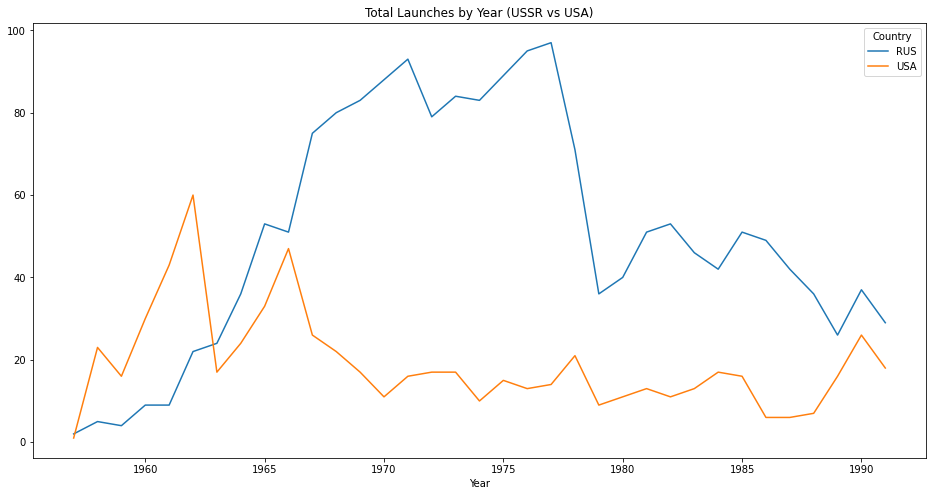

In [59]:
cold_war_launch_by_year.plot(
    figsize = (16,8),
    title = 'Total Launches by Year (USSR vs USA)'
)

Most of the time, USSR conducts more missions than USA

## Chart the Total Number of Mission Failures Year on Year.

In [60]:
cold_war_mission_failures_by_year = ussr_vs_usa[ussr_vs_usa['Mission_Status']!='Success'].groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
cold_war_mission_failures_by_year.fillna(0, inplace=True)
cold_war_mission_failures_by_year

Country,RUS,USA
Year,,
1957,0.00,1.00
1958,4.00,18.00
1959,2.00,10.00
1960,6.00,14.00
1961,4.00,16.00
1962,7.00,10.00
1963,8.00,4.00
1964,7.00,5.00
1965,6.00,7.00


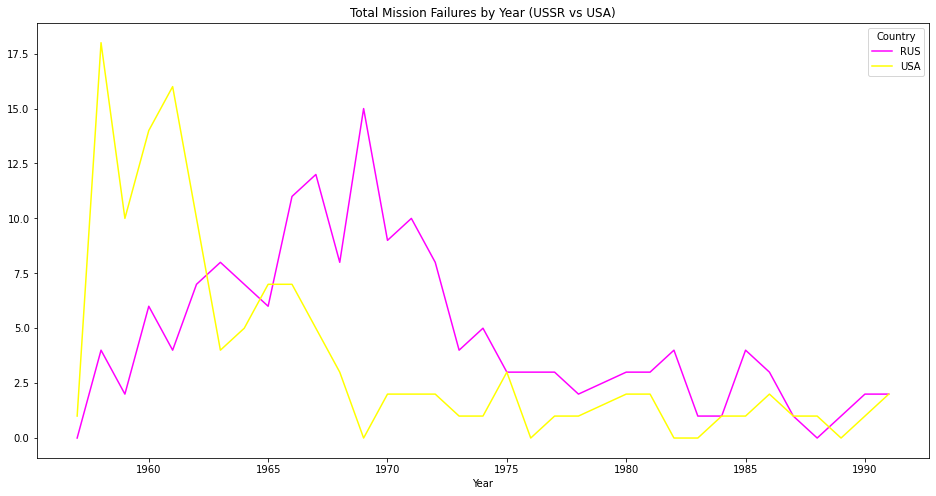

In [61]:
cold_war_mission_failures_by_year.plot(
    figsize = (16,8),
    title = 'Total Mission Failures by Year (USSR vs USA)',
    colormap='spring'
)

I think we can conclude through this chart that the more launches either country conducted, the more failures they receive. There are gaps in the chart because sometimes the missions are on a success streak

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [62]:
# Failure Percentage = number of unsuccessful missions / number of missions * 100
cold_war_failpct_by_year = cold_war_mission_failures_by_year/cold_war_launch_by_year * 100
cold_war_failpct_by_year.fillna(0, inplace=True)
cold_war_failpct_by_year

Country,RUS,USA
Year,,
1957,0.00,100.00
1958,80.00,78.26
1959,50.00,62.50
1960,66.67,46.67
1961,44.44,37.21
1962,31.82,16.67
1963,33.33,23.53
1964,19.44,20.83
1965,11.32,21.21


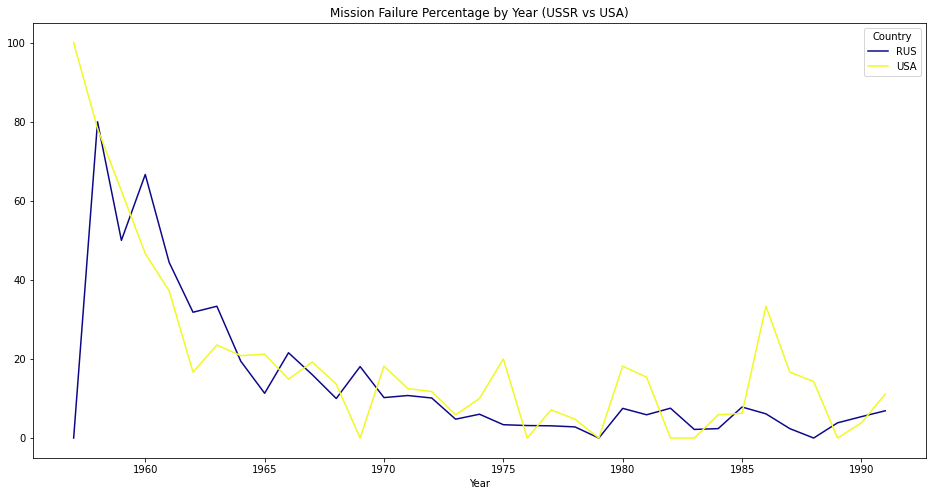

In [63]:
cold_war_failpct_by_year.plot(
    figsize = (16,8),
    title = 'Mission Failure Percentage by Year (USSR vs USA)',
    colormap='plasma'
)

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2020)

Do the results change if we only look at the number of successful launches? 

In [64]:
launches_by_country_per_year = df.groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
launches_by_country_per_year.fillna(0, inplace=True)
launches_by_country_per_year

Country,AUS,BRA,CHN,FRA,IND,IRN,ISR,JPN,KAZ,KEN,KIR,KOR,NZL,PRK,RUS,USA
Year,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1958,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,22.00,11.00,7.00,0.00,1.00,4.00,11.00,0.00,0.00,0.00,0.00,1.00,6.00,27.00
2017,0.00,0.00,18.00,11.00,5.00,1.00,0.00,7.00,13.00,0.00,0.00,0.00,1.00,0.00,6.00,30.00
2018,0.00,0.00,39.00,11.00,7.00,0.00,0.00,6.00,9.00,0.00,0.00,0.00,3.00,0.00,8.00,34.00


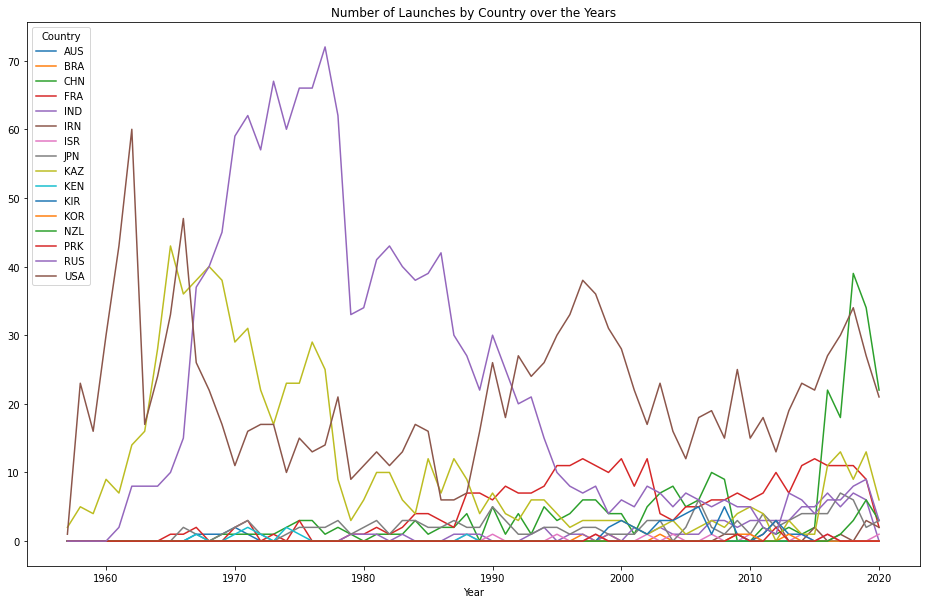

In [65]:
launches_by_country_per_year.plot(
    title = 'Number of Launches by Country over the Years',
    figsize = (16,10),
)

- From the 1957 - mid 1960s and from 1990 - mid 2010s, the leading country in the space race in terms of number of launches is USA
- Between the mid 1960s and 1990s, the leading country in the space race in terms of number of launches is the Russian Federation
- From mid 2010-2020, the leading country in Space Race in terms of number of launches is China

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [66]:
launches_by_organisation_per_year = df.groupby(['Year', 'Organisation'])['Mission_Status'].count().unstack(level=1)
launches_by_organisation_per_year.fillna(0, inplace=True)
launches_by_organisation_per_year

Organisation,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,CNES,Douglas,EER,ESA,Eurockot,ExPace,Exos,General Dynamics,IAI,ILS,IRGC,ISA,ISAS,ISRO,JAXA,KARI,KCST,Khrunichev,Kosmotras,Land Launch,Landspace,Lockheed,MHI,MITT,Martin Marietta,NASA,Northrop,OKB-586,OneSpace,RAE,RVSN USSR,Rocket Lab,Roscosmos,SRC,Sandia,Sea Launch,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1957,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1958,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00
1959,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,4.00,0.00,0.00,0.00,0.00,0.00
1960,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00
1961,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.00,0.00,0.00,11.00,0.00,4.00,0.00,22.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,7.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,9.00,0.00,12.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00
2017,0.00,0.00,0.00,11.00,0.00,1.00,0.00,16.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,5.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,6.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,1.00,9.00,0.00,0.00,0.00,18.00,0.00,8.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00
2018,0.00,0.00,0.00,11.00,0.00,2.00,0.00,37.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,0.00,0.00,21.00,0.00,8.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00


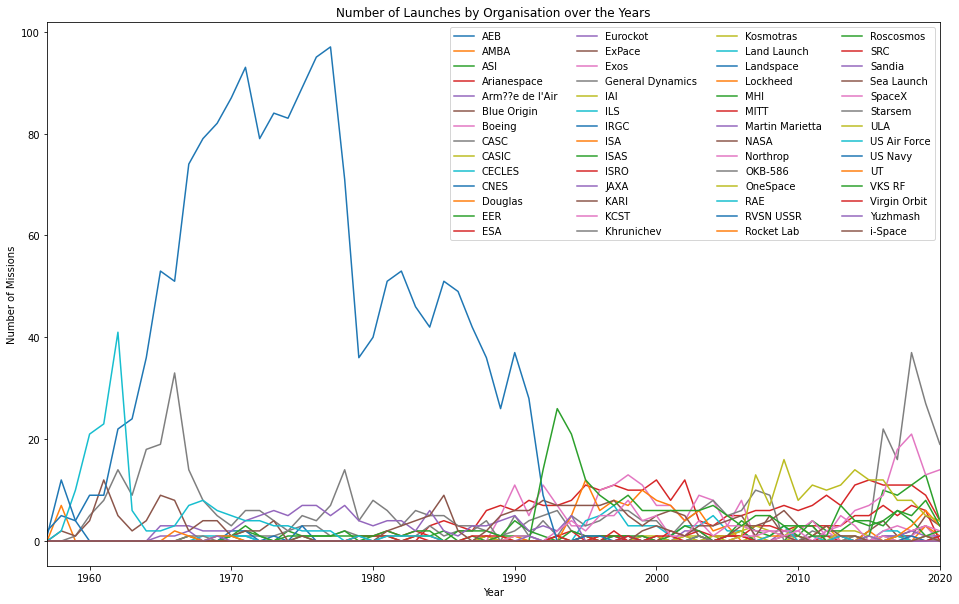

In [67]:
launches_by_organisation_per_year.plot(
    title = 'Number of Launches by Organisation over the Years',
    figsize = (16,10),
)

plt.ylabel('Number of Missions')
plt.xlim(1957, 2020)
plt.legend(loc="upper right", ncol=4)
plt.show()

I'm way too sleep deprived to conclude this plot, but just like everything else, At first US Air Force leads the number of mission, then RSVN USSR, between 1990 - mid 2010-2020, So many organisations are competing, that the top organisations varies. From mid 2010-2020 to 2020, the CASC took the lead.